In [10]:
import pandas as pd
#data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
data = pd.read_csv('..\data\\a10.csv', parse_dates=['date'], index_col='date')

data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [11]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [28]:
df[12:24]
data['value'][-36:]

date
2005-07-01    15.829550
2005-08-01    17.554701
2005-09-01    18.100864
2005-10-01    17.496668
2005-11-01    19.347265
2005-12-01    20.031291
2006-01-01    23.486694
2006-02-01    12.536987
2006-03-01    15.467018
2006-04-01    14.233539
2006-05-01    17.783058
2006-06-01    16.291602
2006-07-01    16.980282
2006-08-01    18.612189
2006-09-01    16.623343
2006-10-01    21.430241
2006-11-01    23.575517
2006-12-01    23.334206
2007-01-01    28.038383
2007-02-01    16.763869
2007-03-01    19.792754
2007-04-01    16.427305
2007-05-01    21.000742
2007-06-01    20.681002
2007-07-01    21.834890
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
2008-01-01    29.665356
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, dtype: float64

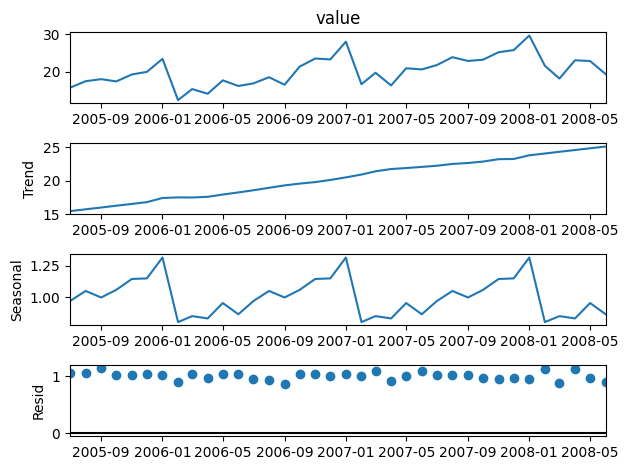

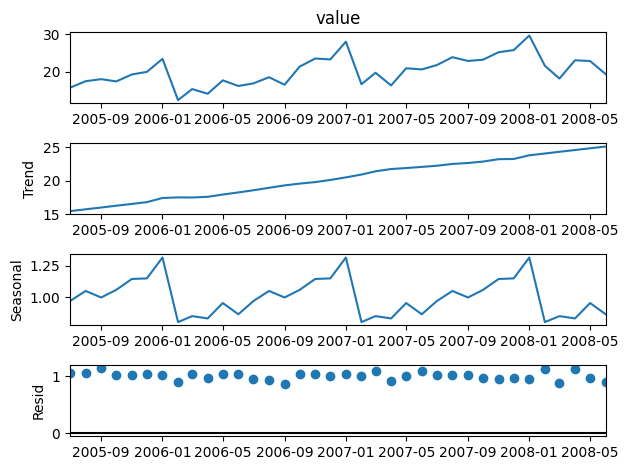

In [23]:
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')
result_mul.plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

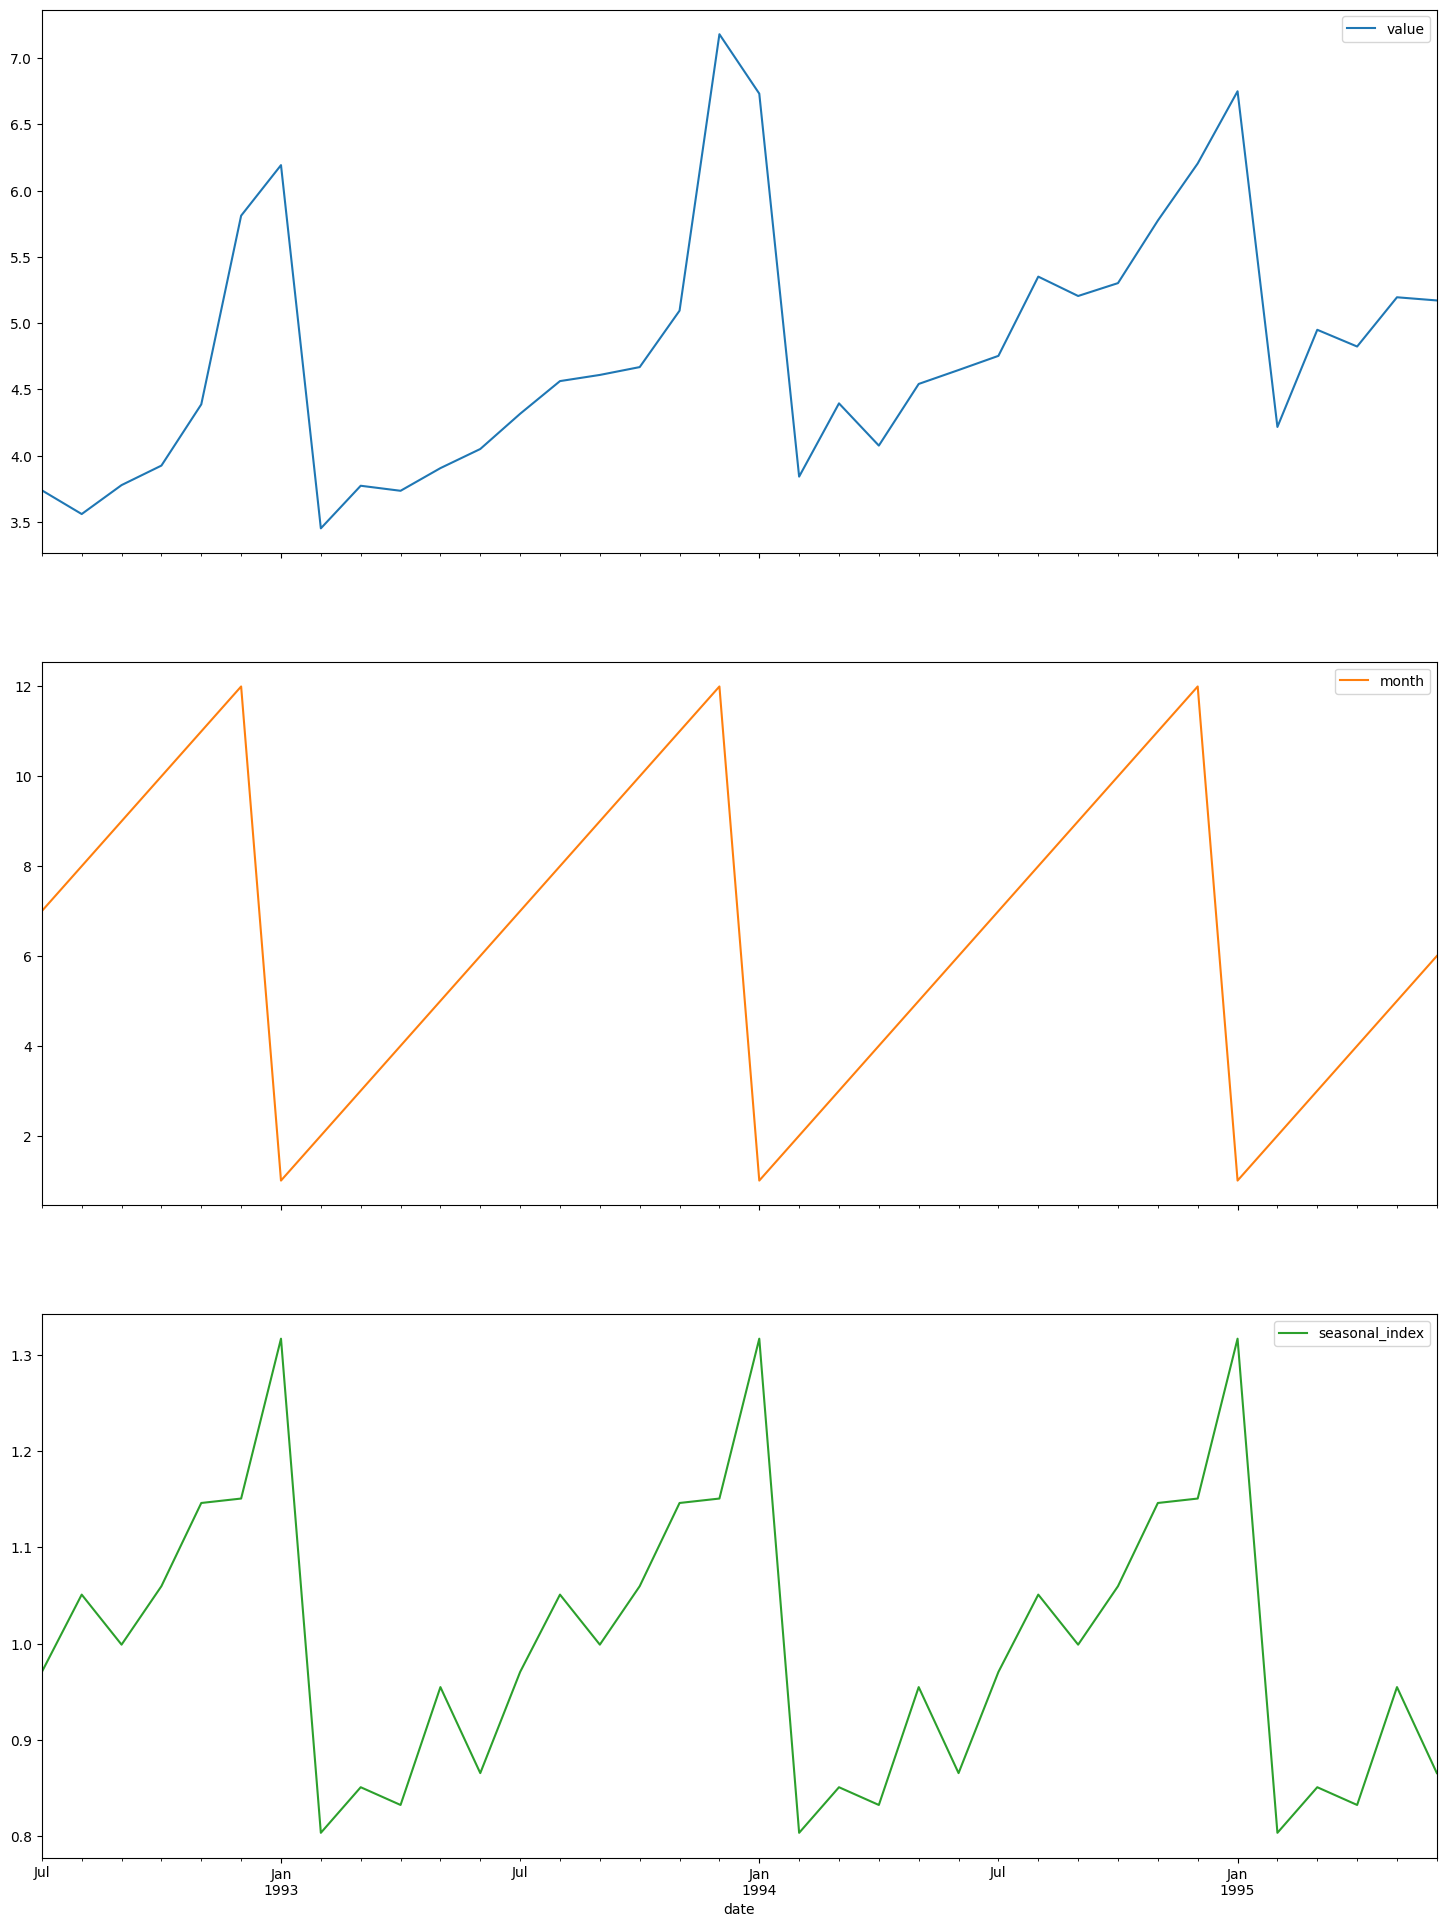

In [17]:
df[12:48].plot(subplots=True,figsize =(18,24))
#pyplot.show()

In [10]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], X=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.17 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=1.76 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=0.71 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.651, Time=2.44 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.19 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=0.67 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.19 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

In [11]:
print(sxmodel.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.950
Date:                            Tue, 01 Nov 2022   AIC                            525.901
Time:                                    14:56:30   BIC                            555.218
Sample:                                07-01-1991   HQIC                           537.775
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0052      0.009      0.581      0.561      -0.012       0.023
seasonal_index  1.588e-